# Introduction
This notebook focuses on loading and visualising test data from the [GECCO 2017 competition](http://www.spotseven.de/gecco/gecco-challenge/gecco-challenge-2017/) ([Rules](https://notebooks.azure.com/n/UxScBeYo9pM/files/rulesGeccoIc2017.pdf))

---
# Code

## Load data
Data is loaded using the *read_csv* function from **pandas**.

In [14]:
# Import pandas for reading CSV files.
import pandas as pd

# Load data
my_data = pd.read_csv('waterDataTesting.csv', delimiter=',')

/home/nbuser/anaconda3_431/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4,5,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Verify data
Data is verified regarding type and size.

In [15]:
# Verify data type
print("Type = " + str(type(my_data)))

# Verify data types
print(str(my_data.dtypes))

# Verify data size
print("Size = " + str(my_data.shape))

print(my_data.describe())

# View first 5 rows
my_data.head(5)

Type = <class 'pandas.core.frame.DataFrame'>
Time                              object
Temperature (Celsius)            float64
Chlorine amount (mg/L)           float64
PH value                          object
Redox potential (mV)              object
Electric conductivity (uS/cm)     object
Turbidity (NTU)                  float64
Chlorine dioxide (mg/L)          float64
Flowrate at line 1 (m^3/h)       float64
Flowrate at line 2 (m^3/h)       float64
Event (boolean)                     bool
EVENTSRC                          object
EVENTSIMULATEDSRC                 object
EVENTSIMULATEDTYPE                object
BASELINE_CHANGE                   object
BASELINE_CHANGESRC                object
dtype: object
Size = (244668, 16)
       Temperature (Celsius)  Chlorine amount (mg/L)  Turbidity (NTU)  \
count          186486.000000           186488.000000    186489.000000   
mean                5.082141                0.146013         0.019948   
std                 0.811845                0.

,Time,Temperature (Celsius),Chlorine amount (mg/L),PH value,Redox potential (mV),Electric conductivity (uS/cm),Turbidity (NTU),Chlorine dioxide (mg/L),Flowrate at line 1 (m^3/h),Flowrate at line 2 (m^3/h),Event (boolean),EVENTSRC,EVENTSIMULATEDSRC,EVENTSIMULATEDTYPE,BASELINE_CHANGE,BASELINE_CHANGESRC
0,15/02/2016 12:54,4.4,0.14,8.38,755,232,0.009,0.110,1428.0,1020.0,False,NaN,NaN,NaN,NaN,NaN
1,15/02/2016 12:55,4.4,0.14,8.38,755,232,0.009,0.111,1436.0,1018.0,False,NaN,NaN,NaN,NaN,NaN
2,15/02/2016 12:56,4.4,0.14,8.38,755,232,0.014,0.113,1471.0,1019.0,False,NaN,NaN,NaN,NaN,NaN
3,15/02/2016 12:57,4.4,0.14,8.37,755,232,0.015,0.111,1457.0,1015.0,False,NaN,NaN,NaN,NaN,NaN
4,15/02/2016 12:58,4.4,0.14,8.38,755,232,0.013,0.111,1476.0,1019.0,False,NaN,NaN,NaN,NaN,NaN


## Convert incorrect data types
Most columns are correctly defined as *float64*, but columns Time and Event are defined only as *object*.

Convert the first column to *Datetime* and the last to *bool*.

In [17]:
# Convert first column to Date-Time
my_data['Time'] = my_data["Time"].apply(pd.to_datetime)

# Convert fourth column to float64
my_data['PH value'] = my_data["PH value"].apply(pd.to_numeric, errors='coerce')

# Convert fifth column to float64
my_data['Redox potential (mV)'] = my_data["Redox potential (mV)"].apply(pd.to_numeric, errors='coerce')

# Convert sixth column to float64
my_data['Electric conductivity (uS/cm)'] = my_data["Electric conductivity (uS/cm)"].apply(pd.to_numeric, errors='coerce')

# Verify data types
print(str(my_data.dtypes))

Time                             datetime64[ns]
Temperature (Celsius)                   float64
Chlorine amount (mg/L)                  float64
PH value                                float64
Redox potential (mV)                    float64
Electric conductivity (uS/cm)           float64
Turbidity (NTU)                         float64
Chlorine dioxide (mg/L)                 float64
Flowrate at line 1 (m^3/h)              float64
Flowrate at line 2 (m^3/h)              float64
Event (boolean)                            bool
EVENTSRC                                 object
EVENTSIMULATEDSRC                        object
EVENTSIMULATEDTYPE                       object
BASELINE_CHANGE                          object
BASELINE_CHANGESRC                       object
dtype: object


## Impute missing data

In [18]:
# Impute mean values on NaNs
my_data["Temperature (Celsius)"].fillna(my_data["Temperature (Celsius)"].mean(), inplace=True)
my_data["Chlorine amount (mg/L)"].fillna(my_data["Chlorine amount (mg/L)"].mean(), inplace=True)
my_data["PH value"].fillna(my_data["PH value"].mean(), inplace=True)
my_data["Redox potential (mV)"].fillna(my_data["Redox potential (mV)"].mean(), inplace=True)

## Plots
Let's plot the series in order to visualise the data.
**matplotlib.pyplot** is imported for this.

In [19]:
import matplotlib.pyplot as plt

A function *my_plot* is defined.

In [20]:
# my_plot plots a scatter of normal situation and failure events for the selected series.
def my_plot(my_data, column, plt):
    
    # Arrange data to plot
    plt.scatter(index, my_data[column], zorder = 1, s = 2)
    plt.scatter(index[failure_index], my_data[failure_index][column], color = 'red', zorder = 2, s = 2)

    # Arrange title, labels and legends
    plt.title(column + " vs. Sample")

    plt.xlabel("Sample")
    plt.ylabel(column)

    plt.legend(["Normal", "Failure"])

    # Plot
    plt.show()

Also, a boolean array is created in order to separate the values by *Event*. **Numpy** is imported to manipulate arrays.

In [21]:
# Import numpy
import numpy as np

# Separate data based on event (create boolean array)
index = np.array(range(244668)) + 1
failure_index = np.array(my_data["Event (boolean)"] == True)

### Plot temperature over time
Temperature data is ploted and separated by *Event*. It is possible to see that there are some missing values (test data).

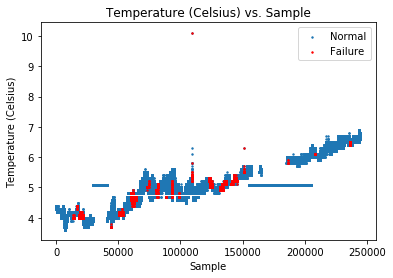

In [23]:
# Select column
column = "Temperature (Celsius)"

# Plot
my_plot(my_data, column, plt)

### Plot chlorine amount over time
Chlorine amount data is ploted and separated by *Event*. It is possible to see same missing values.

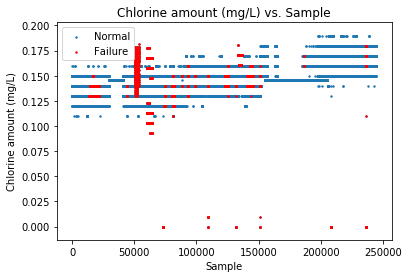

In [24]:
# Select column
column = "Chlorine amount (mg/L)"

# Plot
my_plot(my_data, column, plt)

### Plot PH value over time
PH value data is ploted and separated by *Event*.

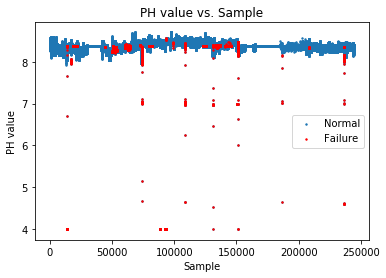

In [25]:
# Select column
column = "PH value"

# Plot
my_plot(my_data, column, plt)

### Plot Redox potential over time
Redox potential data is ploted and separated by *Event*.

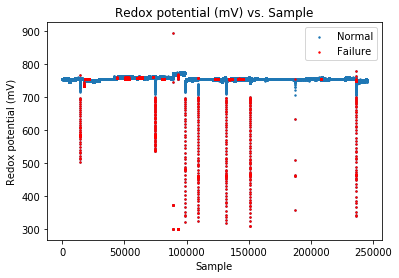

In [26]:
# Select column
column = "Redox potential (mV)"

# Plot
my_plot(my_data, column, plt)

### Plot Electric conductivity over time
Electric conductivity data is ploted and separated by *Event*.

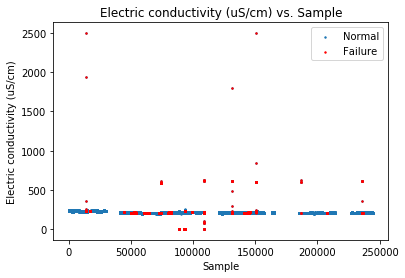

In [27]:
# Select column
column = "Electric conductivity (uS/cm)"

# Plot
my_plot(my_data, column, plt)

### Plot Turbidity over time
Turbidity data is ploted and separated by *Event*.

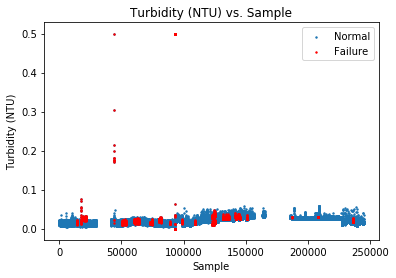

In [28]:
# Select column
column = "Turbidity (NTU)"

# Plot
my_plot(my_data, column, plt)

### Plot Chlorine dioxide over time
Chlorine dioxide data is ploted and separated by *Event*.

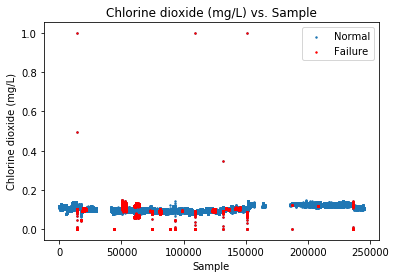

In [29]:
# Select column
column = "Chlorine dioxide (mg/L)"

# Plot
my_plot(my_data, column, plt)

### Plot Flowrate at line 1 over time
Flowrate at line 1 data is ploted and separated by *Event*.

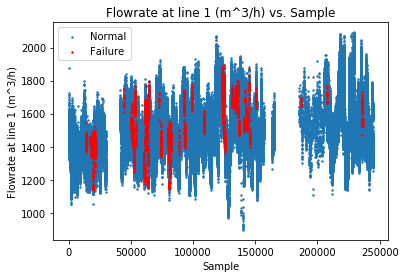

In [30]:
# Select column
column = "Flowrate at line 1 (m^3/h)"

# Plot
my_plot(my_data, column, plt)

### Plot Flowrate at line 2 over time
Flowrate at line 2 data is ploted and separated by *Event*.

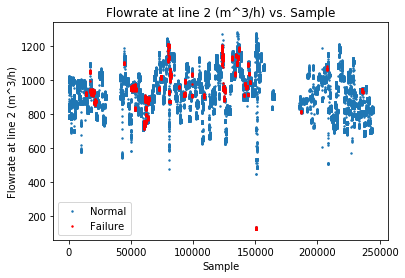

In [31]:
# Select column
column = "Flowrate at line 2 (m^3/h)"

# Plot
my_plot(my_data, column, plt)

## Scatter Plot
Function *my_scatter* is defined to create scatter plots

In [32]:
# my_plot plots a scatter of normal situation and failure events for the selected series.
def my_scatter(my_data, column1, column2, plt):
    
    # Arrange data to plot
    plt.scatter(my_data[column1], my_data[column2], zorder = 1, s = 2)
    plt.scatter(my_data[failure_index][column1], my_data[failure_index][column2], color = 'red', zorder = 2, s = 2)

    # Arrange title, labels and legends
    plt.title(column1 + " vs. " + column2)

    plt.xlabel(column1)
    plt.ylabel(column2)

    plt.legend(["Normal", "Failure"])

    # Plot
    plt.show()


### Chlorine amount (mg/L) vs.  Redox potential (mV)

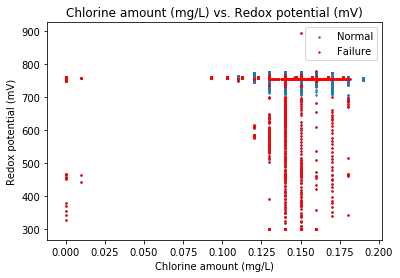

In [33]:
# Select column
column1 = "Chlorine amount (mg/L)"
column2 = "Redox potential (mV)"

# Plot
my_scatter(my_data, column1, column2, plt)

### PH value vs.  Redox potential (mV)

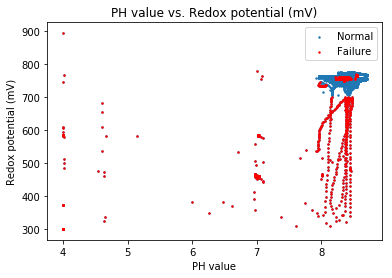

In [34]:
# Select column
column1 = "PH value"
column2 = "Redox potential (mV)"

# Plot
my_scatter(my_data, column1, column2, plt)

### PH value vs.  Chlorine amount (mg/L)

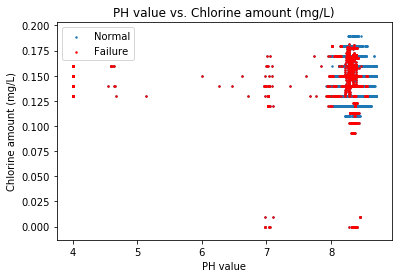

In [35]:
# Select column
column1 = "PH value"
column2 = "Chlorine amount (mg/L)"

# Plot
my_scatter(my_data, column1, column2, plt)